# Module 5 Exercises - Time Series

### Exercise 1:

Create a numPy datetime variable with today's date. Then create 7 consecutive days (1 week) starting from the variable with today's date.

In [3]:
import pandas as pd
import numpy as np    
import seaborn; seaborn.set()
import matplotlib.pyplot as plt

from datetime import datetime   #daytime type 584 year back and futer

%matplotlib inline

In [4]:
date = np.array('2018-04-04', dtype=np.datetime64)

In [5]:
date

array('2018-04-04', dtype='datetime64[D]')

In [6]:
date + np.arange(7)

array(['2018-04-04', '2018-04-05', '2018-04-06', '2018-04-07',
       '2018-04-08', '2018-04-09', '2018-04-10'], dtype='datetime64[D]')

In [7]:
date

array('2018-04-04', dtype='datetime64[D]')

### Exercise 2:

Create a pandas datetime index with the dates 2016-02-11, 2016-07-01, 2016-07-09, 2016-10-08, 2017-02-18, 2017-02-25, 2017-05-02, 2017-08-26, 2017-12-15, and 2018-02-11. Then create a pandas Series with the values 0,1,2,3,4,5,6,7,8, and 9 in a list, with the dates as the index. Get the rows from the year 2017.  

In [8]:
index = pd.DatetimeIndex(['2018-04-04', '2018-04-05', '2018-04-06', '2018-04-07',
       '2018-04-08', '2018-04-09', '2018-04-10'])
data = pd.Series([0,1,2,3,4,5,6], index=index)  #= to make single column

In [9]:
data['2018']

2018-04-04    0
2018-04-05    1
2018-04-06    2
2018-04-07    3
2018-04-08    4
2018-04-09    5
2018-04-10    6
dtype: int64

### Exercise 3:

Convert the following date formats into pandas datetime:

- datetime(2017, 12, 15)
- 8th of October 2016
- 20180211
- 2017-02-25
- 2019-Jan-16

In [10]:
dates = pd.to_datetime([datetime(2017,12,15), "8th of October 2016", "20180211", "2017-02-25", "2019-Jan-16"])

In [11]:
dates

DatetimeIndex(['2017-12-15', '2016-10-08', '2018-02-11', '2017-02-25',
               '2019-01-16'],
              dtype='datetime64[ns]', freq=None)

### Exercise 4:

Using the pandas library, make a time delta range that has five periods with a 1 hour 45 minute interval.

In [12]:
Times = pd.timedelta_range(0, freq='1H45T', periods=5)
Times

TimedeltaIndex(['00:00:00', '01:45:00', '03:30:00', '05:15:00', '07:00:00'], dtype='timedelta64[ns]', freq='105T')

### Exercise 5:

Using the pandas library, create a date range with 20 business days starting from today's date.

In [13]:
from pandas.tseries.offsets import BDay #.tseries.offsets

bizdays = pd.date_range('2019-04-04', periods=20, freq=BDay()) # BUSINESS DAY
bizdays

DatetimeIndex(['2019-04-04', '2019-04-05', '2019-04-08', '2019-04-09',
               '2019-04-10', '2019-04-11', '2019-04-12', '2019-04-15',
               '2019-04-16', '2019-04-17', '2019-04-18', '2019-04-19',
               '2019-04-22', '2019-04-23', '2019-04-24', '2019-04-25',
               '2019-04-26', '2019-04-29', '2019-04-30', '2019-05-01'],
              dtype='datetime64[ns]', freq='B')

### Exercise 6:

From [this link](https://notebooks.azure.com/priesterkc/projects/DABmaterial/tree/Lv1%20Data%20Analytics/datasets), download the "smalltravel.csv" file and upload it to your datasets folder. Import the traveltime_s.csv file into a dataframe. Resample the average speed column by week using the mean, and plot the graph. 

**Tip**: You do not need to add the line style in the plot code.

In [14]:
#df['col'] = pd.to_datetime(df['col'])

In [15]:
traveldf = pd.read_csv("datasets/smalltravel.csv", index_col='Date', parse_dates=True)
traveldf.head()

,GoingTo,AvgSpeed,MovingTime
Date,,,
2012-01-06,Home,78.3,36.3
2012-01-06,GSK,81.8,34.9
2012-01-04,Home,82.0,35.9
2012-01-04,GSK,74.2,35.6
2012-01-03,Home,83.4,34.8


## Resampling Data

The resample method in pandas is similar to its groupby method as you are essentially grouping by a certain time span. You then specify a method of how you would like to resample.

So we’ll start with resampling the speed of our car:

df.speed.resample() will be used to resample the speed column of our DataFrame
The 'W' indicates we want to resample by week. ```mean()``` is used to indicate we want the mean speed during this period.

```python
weekly = traveldf['AvgSpeed'].resample('W').mean()
weekly.plot()
```

### Resampling options
pandas comes with many in-built options for resampling, and you can even define your own methods.

In terms of date ranges, the following is a table for common time period options when resampling a time series:

|Alias|Description|
| :----------: | -----------: |
B|Business day
D|Calendar day
W|Weekly
M|Month end
Q|Quarter end
A|Year end
BA|Business year end
AS|Year start
H|Hourly frequency
T, min|Minutely frequency
S|Secondly frequency

More Details: http://benalexkeen.com/resampling-time-series-data-with-pandas/

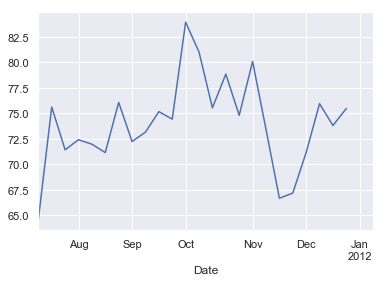

In [16]:
weekly = traveldf['AvgSpeed'].resample('W').mean()
weekly.plot()

### Exercise 7:

Using the dataframe from the previous exercise, write code to group the moving time column by day of the week, then plot the graph.

**Tip**: The index list only needs to contain the weekdays. You do not need to add the line style in the plot code.

In [17]:
traveldf.index.dayofweek

Int64Index([4, 4, 2, 2, 1, 1, 0, 0, 4, 3,
            ...
            3, 2, 2, 1, 1, 0, 3, 2, 1, 0],
           dtype='int64', name='Date', length=205)

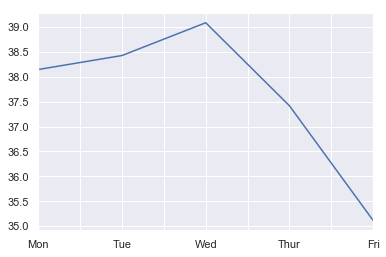

In [11]:
by_weekday = traveldf['MovingTime'].groupby(traveldf.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri']
by_weekday.plot()